# Exercise 18


We consider the function
$
g(r,\theta) = r^{\tfrac{2}{3}} \,\sin\!\left(\tfrac{2}{3}\theta\right).
$
Polar coordinates are defined by
$
r = \sqrt{x^2 + y^2}, \qquad \theta = \operatorname{atan2}(y,x).
$

The domain is the L-shaped region
$
\Omega = (-1,1)^2 \setminus \big( (-1,0] \times (-1,0] \big).
$

We study the Dirichlet problem

\begin{aligned}
- \Delta u &= 0 && \text{in } \Omega, \\
u &= g && \text{on } \partial\Omega .
\end{aligned}


Since $ (0,0) \notin \Omega $, we always have $(r>0)$ in the interior, and therefore we may use polar coordinates safely.


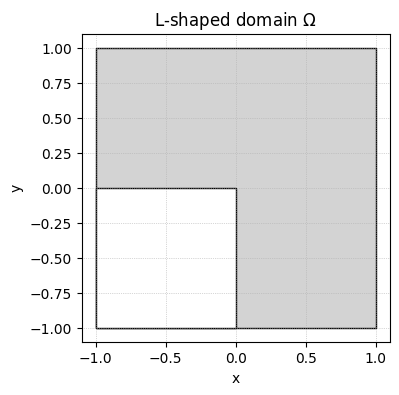

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

fig, ax = plt.subplots(figsize=(4, 4))

# Big square: (-1,-1) to (1,1)
outer = patches.Rectangle((-1, -1), 2, 2,
                          facecolor="lightgray", edgecolor="black")
ax.add_patch(outer)

# Cut-out lower-left square: (-1,-1) to (0,0)
hole = patches.Rectangle((-1, -1), 1, 1,
                         facecolor="white", edgecolor="black")
ax.add_patch(hole)

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_aspect("equal", "box")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("L-shaped domain $\\Omega$")

plt.grid(True, linestyle=":", linewidth=0.5)
plt.show()


## Harmonicity of $g$ via the polar Laplacian

The Laplacian in polar coordinates is  
$$
\Delta g
= g_{rr} + \frac{1}{r}\, g_r + \frac{1}{r^2}\, g_{\theta\theta}.
$$

We have  
$$
g(r,\theta) = r^{\frac{2}{3}} \sin\!\left(\frac{2}{3}\theta\right).
$$

###  derivatives

$$
g_r = \frac{2}{3} r^{-\frac{1}{3}} \sin\!\left(\frac{2}{3}\theta\right),
$$
$$
g_{rr}
= -\frac{2}{9} r^{-\frac{4}{3}} \sin\!\left(\frac{2}{3}\theta\right).
$$
$$
g_\theta = \frac{2}{3} r^{\frac{2}{3}} \cos\!\left(\frac{2}{3}\theta\right),
$$
$$
g_{\theta\theta}
= -\frac{4}{9} r^{\frac{2}{3}} \sin\!\left(\frac{2}{3}\theta\right).
$$

### Plugging into the polar Laplacian

$$
\begin{aligned}
\Delta g
&= -\frac{2}{9} r^{-\frac{4}{3}} \sin\!\left(\frac{2}{3}\theta\right)
   + \frac{2}{3} r^{-\frac{4}{3}} \sin\!\left(\frac{2}{3}\theta\right)
   - \frac{4}{9} r^{-\frac{4}{3}} \sin\!\left(\frac{2}{3}\theta\right) \\[0.4em]
&= \left( -\frac{2}{9} + \frac{6}{9} - \frac{4}{9} \right)
   r^{-\frac{4}{3}} \sin\!\left(\frac{2}{3}\theta\right)
= 0.
\end{aligned}
$$

Thus $g$ is harmonic on $\Omega$.


In [10]:
# load Netgen/NGSolve 
from ngsolve import *
from ngsolve.webgui import Draw
from netgen.occ import * 

In [28]:
outer = MoveTo(-1,-1).Rectangle(2,2).Face()
outer.edges.name="outer"
outer.edges.Max(X).name = "r"
outer.edges.Min(X).name = "l"
outer.edges.Min(Y).name = "b"
outer.edges.Max(Y).name = "t"

inner = MoveTo(-1,-1).Rectangle(1,1).Face()
inner.edges.name="interface"


# L-shaped domain: outer minus inner
lshape = outer - inner
lshape.faces.name = "domain"
lshape.edges.name = "boundary"


inner.faces.name="inner"
inner.faces.col = (1, 1, 1)
outer.faces.name="outer"

geo = OCCGeometry(lshape)

#geo = Glue([inner, outer])
Draw(lshape);

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'ngsolve_version': 'Netgen x.x', 'mesh_dim': 3…

In [30]:
mesh = Mesh(OCCGeometry(lshape, dim=2).GenerateMesh(maxh=0.2))
Draw(mesh);

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.25…

In [31]:
mesh.nv, mesh.ne

(105, 168)

In [38]:
fes = H1(mesh, order=6, dirichlet="boundary")
print ("number of dofs =", fes.ndof)

number of dofs = 3145


In [40]:
u = fes.TrialFunction()
v = fes.TestFunction()
a = BilinearForm(grad(u)*grad(v)*dx)

In [41]:
f = LinearForm(fes)
# no term to add, since RHS is 0
f.Assemble()
a.Assemble()

In [42]:
from ngsolve import x, y, sqrt, atan2, sin

r     = sqrt(x*x + y*y)
theta = atan2(y, x)
g_exact = r**(2/3) * sin(2*theta/3)


In [43]:
gfu = GridFunction(fes)
gfu.Set(g_exact, definedon=mesh.Boundaries("boundary"))


In [44]:
Draw (gfu, euler_angles=[-60,-10,-20], deformation=True, scale=0.3);

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {'camera': {'euler_angles': [-…

In [45]:
Draw (grad(gfu), mesh, order=3, vectors = True);

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.25…

In [46]:
Draw(gfu, mesh, "uh")

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.25…

BaseWebGuiScene

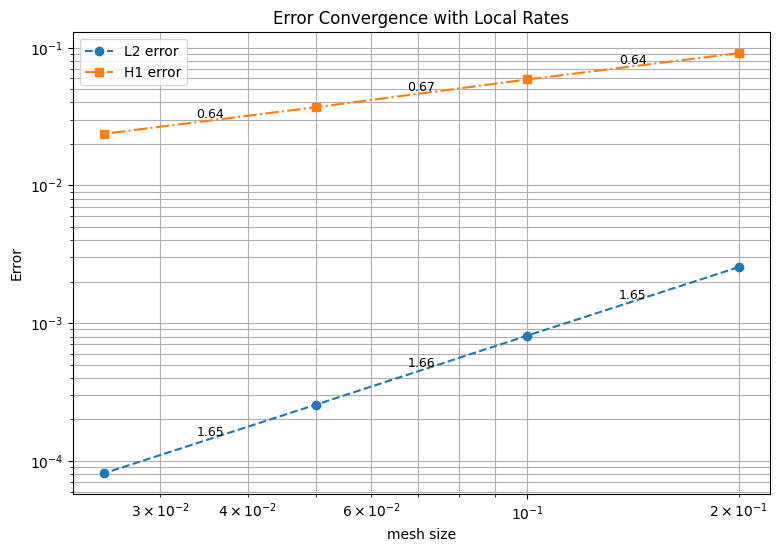

h		L2 error		L2 rate		H1 error		H1 rate
--------------------------------------------------------------------------------
0.20000	2.54755e-03	      		9.11214e-02	      
0.10000	8.11482e-04	 1.650		5.86466e-02	 0.636
0.05000	2.56013e-04	 1.664		3.69159e-02	 0.668
0.02500	8.15830e-05	 1.650		2.36725e-02	 0.641


In [49]:
# interpolation
uex = CF( g_exact) 
graduex = CF( (uex.Diff(x), uex.Diff(y) ))

errL2 = []
errH1 = []
h = []

for i in range(4):
    h.append( 0.2 / ( 2**i) )
    mesh = Mesh(unit_square.GenerateMesh(maxh=h[-1]))
    fes = H1(mesh, order = 1)
    gfu = GridFunction(fes)
    gfu.Set(uex, dual = True)
    errL2.append (sqrt( Integrate( (gfu - uex)**2, mesh)))
    errH1.append( sqrt( Integrate( (grad(gfu) - graduex)**2, mesh)))

import numpy as np

def compute_rates(err_vec, nel_vec):
    rates = []
    for i in range(len(nel_vec)-1):
        r = np.log(err_vec[i] / err_vec[i+1]) / np.log(h[i] / h[i+1])
        rates.append(r)
    return rates

rates_L2 = compute_rates(errL2, h)
rates_H1 = compute_rates(errH1, h)

import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))

# Plot errors
plt.loglog(h, errL2, marker="o", linestyle="--", label="L2 error")
plt.loglog(h, errH1, marker="s", linestyle="-.", label="H1 error")


# Annotate convergence rates
def annotate_rates(nel_vec, err_vec, rates, y_offset=0):
    for i in range(len(rates)):
        x_mid = np.sqrt(nel_vec[i] * nel_vec[i+1])
        y_mid = np.sqrt(err_vec[i] * err_vec[i+1])
        plt.text(x_mid, y_mid*(1+y_offset), f"{rates[i]:.2f}", fontsize=9, ha="center")

annotate_rates(h, errL2, rates_L2, y_offset=0.05)
annotate_rates(h, errH1, rates_H1, y_offset=0.05)


plt.xlabel("mesh size")
plt.ylabel("Error")
plt.title("Error Convergence with Local Rates")
plt.legend()
plt.grid(True, which="both")

plt.show()

print("h\t\tL2 error\t\tL2 rate\t\tH1 error\t\tH1 rate")
print("-"*80)
for i in range(len(h)):
    h_i = h[i]
    eL2 = errL2[i]
    eH1 = errH1[i]
    if i == 0:
        rL2 = ""
        rH1 = ""
    else:
        rL2 = f"{rates_L2[i-1]:.3f}"
        rH1 = f"{rates_H1[i-1]:.3f}"
    print(f"{h_i:.5f}\t{eL2:.5e}\t{rL2:>6}\t\t{eH1:.5e}\t{rH1:>6}")





